In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load COVID-19 dataset from Johns Hopkins University
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
covid_data = pd.read_csv(url)

In [26]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [27]:
covid_data.shape

(289, 1147)

In [28]:
print(covid_data.isnull().sum())

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64


In [30]:
covid_data.drop(columns={'Province/State'},inplace=True)

In [31]:
melted_df = pd.melt(covid_data, id_vars=['Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Cases')

In [32]:
melted_df

,Country/Region,Lat,Long,Date,Cases
0,Afghanistan,33.939110,67.709953,1/22/20,0
1,Albania,41.153300,20.168300,1/22/20,0
2,Algeria,28.033900,1.659600,1/22/20,0
3,Andorra,42.506300,1.521800,1/22/20,0
4,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...
330322,West Bank and Gaza,31.952200,35.233200,3/9/23,703228
330323,Winter Olympics 2022,39.904200,116.407400,3/9/23,535
330324,Yemen,15.552727,48.516388,3/9/23,11945
330325,Zambia,-13.133897,27.849332,3/9/23,343135


In [33]:
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

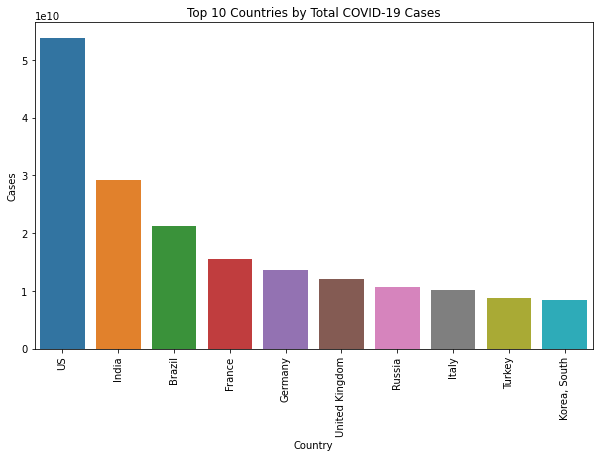

In [34]:
# Calculate total cases per country
country_cases = covid_data.iloc[:, 3:].sum(axis=1)

# Add country cases to DataFrame
covid_data['Total Cases'] = country_cases

# Sort and plot top 10 countries
top_10 = covid_data.nlargest(10, 'Total Cases')
plt.figure(figsize=(10,6))
sns.barplot(x='Country/Region', y='Total Cases', data=top_10)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()

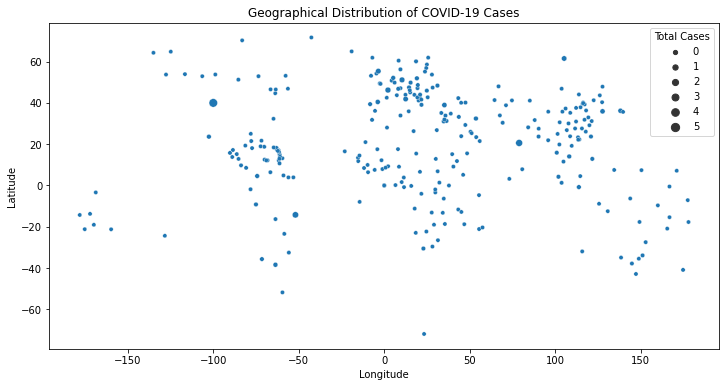

In [35]:
# Plot geographical distribution of COVID-19 cases
plt.figure(figsize=(12,6))
sns.scatterplot(x='Long', y='Lat', size='Total Cases', data=covid_data)
plt.title('Geographical Distribution of COVID-19 Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [36]:
top_10 = covid_data.nlargest(10, 'Total Cases')

In [37]:
top_10_countries = top_10['Country/Region'].tolist()

In [38]:
top_10_trend = melted_df[melted_df['Country/Region'].isin(top_10_countries)]

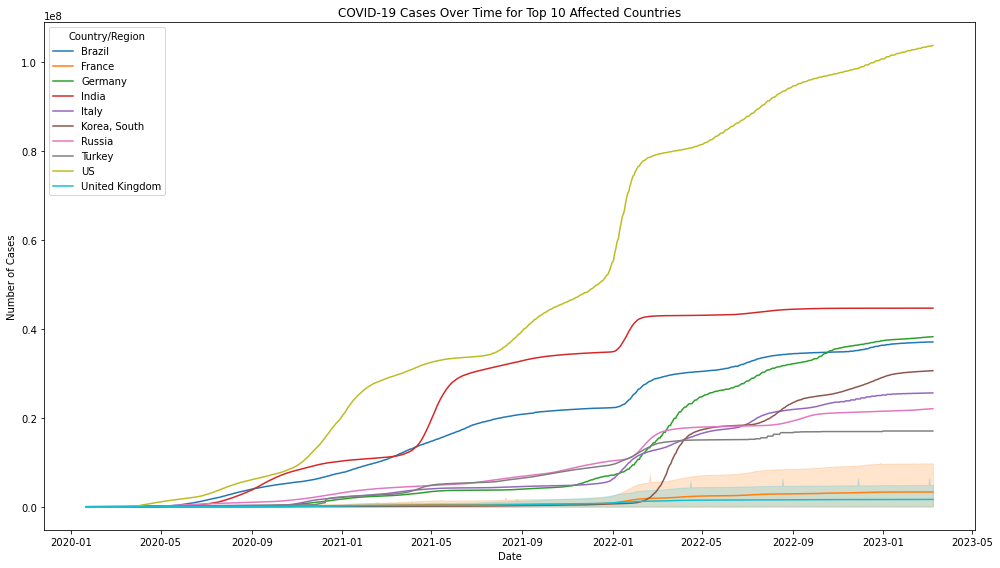

In [39]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_10_trend, x='Date', y='Cases', hue='Country/Region', marker='')
plt.title('COVID-19 Cases Over Time for Top 10 Affected Countries')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

In [40]:
top_5 = covid_data.nlargest(5, 'Total Cases')

In [41]:
top_5_countries = top_5['Country/Region'].tolist()

In [42]:
top_5_trend = melted_df[melted_df['Country/Region'].isin(top_5_countries)]

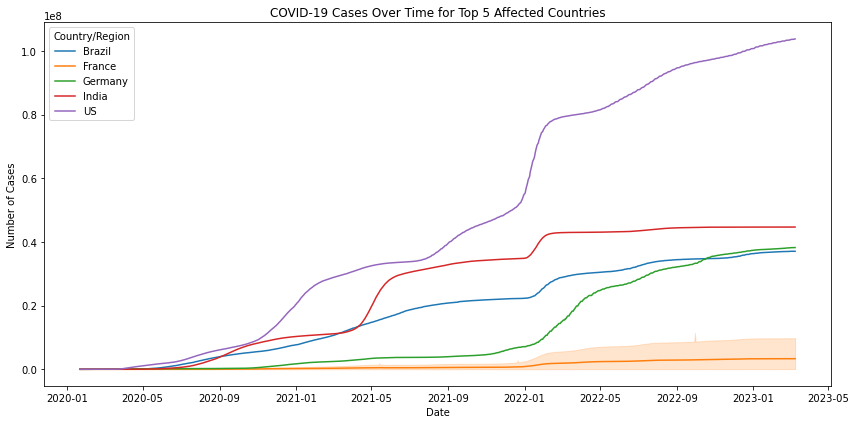

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_5_trend, x='Date', y='Cases', hue='Country/Region')
plt.title('COVID-19 Cases Over Time for Top 5 Affected Countries')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

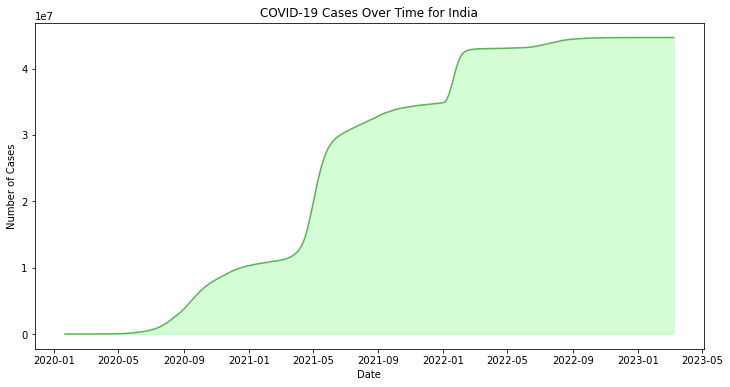

In [44]:
ind_time_series = melted_df[melted_df['Country/Region']=='India']
plt.figure(figsize=(12,6))
plt.fill_between('Date','Cases',data=ind_time_series,color="palegreen", alpha=0.4)
plt.plot('Date','Cases',data=ind_time_series, color="green", alpha=0.6)
plt.title('COVID-19 Cases Over Time for India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

In [45]:
df = melted_df

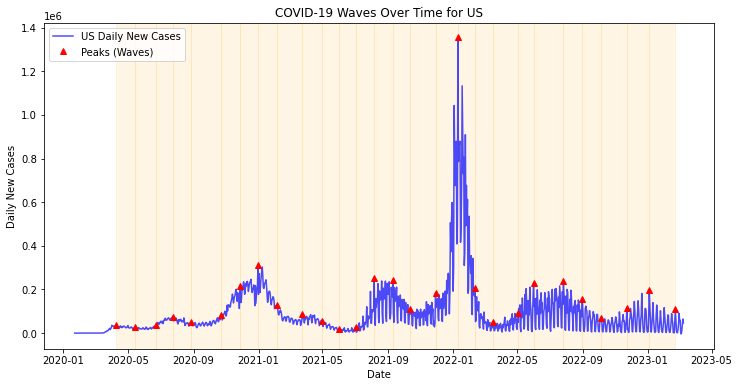

In [46]:
from scipy.signal import find_peaks

df = df.sort_values(['Country/Region', 'Date'])
df['Daily_New_Cases'] = df.groupby('Country/Region')['Cases'].diff().fillna(0)
country_name = "US"
country_data = df[df['Country/Region'] == country_name].copy()

peaks, _ = find_peaks(country_data['Daily_New_Cases'], distance=30, height=500) 

plt.figure(figsize=(12, 6))

plt.plot(country_data['Date'], country_data['Daily_New_Cases'], label=f'{country_name} Daily New Cases', color='blue', alpha=0.7)

plt.plot(country_data['Date'].iloc[peaks], country_data['Daily_New_Cases'].iloc[peaks], "r^", label="Peaks (Waves)")

# Shading to indicate waves (optional)
for i in range(1, len(peaks)):
    plt.axvspan(country_data['Date'].iloc[peaks[i-1]], country_data['Date'].iloc[peaks[i]], color='orange', alpha=0.1)
    
# Customize the plot
plt.title(f'COVID-19 Waves Over Time for {country_name}')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.legend()
plt.show()

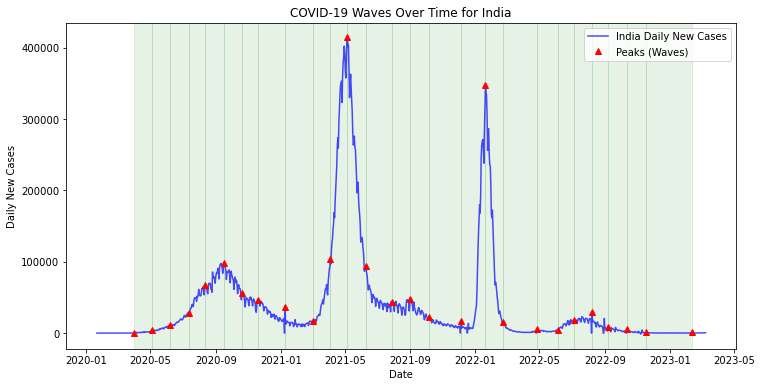

In [47]:
df = df.sort_values(['Country/Region', 'Date'])
df['Daily_New_Cases'] = df.groupby('Country/Region')['Cases'].diff().fillna(0)
country_name = "India"
country_data = df[df['Country/Region'] == country_name].copy()

peaks, _ = find_peaks(country_data['Daily_New_Cases'], distance=30, height=500) 

plt.figure(figsize=(12, 6))

plt.plot(country_data['Date'], country_data['Daily_New_Cases'], label=f'{country_name} Daily New Cases', color='blue', alpha=0.7)

plt.plot(country_data['Date'].iloc[peaks], country_data['Daily_New_Cases'].iloc[peaks], "r^", label="Peaks (Waves)")

# Shading to indicate waves (optional)
for i in range(1, len(peaks)):
    plt.axvspan(country_data['Date'].iloc[peaks[i-1]], country_data['Date'].iloc[peaks[i]], color='green', alpha=0.1)
    
# Customize the plot
plt.title(f'COVID-19 Waves Over Time for {country_name}')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.legend()
plt.show()

In [56]:
import pandas as pd
import plotly.express as px

# Aggregate total cases by country
total_cases_by_country = df.groupby('Country/Region')['Cases'].sum().reset_index()
total_cases_by_country.columns = ['Country', 'Total_Cases']

# Plot using Plotly's built-in GeoJSON map for countries
fig = px.choropleth(total_cases_by_country,
                    locations="Country",
                    locationmode="country names",
                    color="Total_Cases",
                    hover_name="Country",
                    color_continuous_scale="Reds",
                    title="Total COVID-19 Cases by Country")

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()
